In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load trends
df = pd.read_csv('../data/trends.csv', parse_dates=['Timestamp'])
df = df[df['Topic'] != -1]
top_trends = pd.read_csv('../data/trend_top.csv')
topic_ids = top_trends['TopicID']
df = df[df['Topic'].isin(topic_ids)]

In [2]:
topic_ids

0    43
1    38
2    41
Name: TopicID, dtype: int64

In [3]:
top_trends

,Unnamed: 0,TopicID,Label,Score,Keywords
0,0,43,Routine,10.912207,replying routine routine skincare skincarerout...
1,1,38,Korean skincare,8.765399,lewkin duo powder cleanser pore
2,2,41,Glow-up,5.706873,crocs comments ice boyfriend video


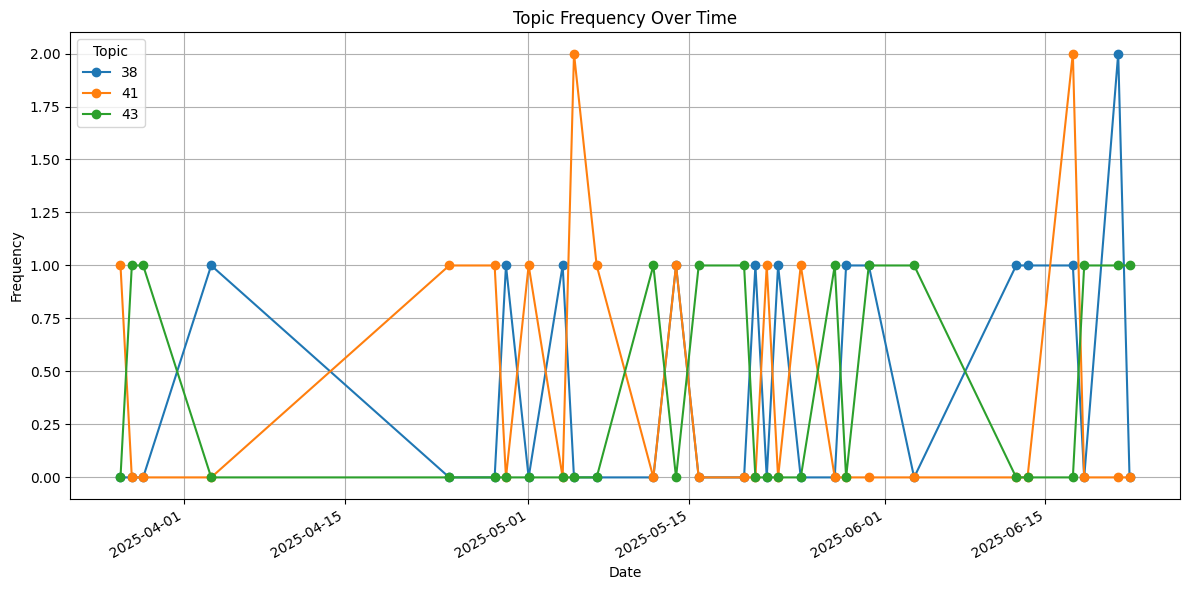

In [4]:
# 1) Group by Timestamp & Topic to aggregate Frequency
grouped = (
    df
    .groupby(['Timestamp', 'Topic'])['Frequency']
    .sum()
    .reset_index()
)

# 2) Pivot so each Topic is a column
pivot = grouped.pivot(index='Timestamp', columns='Topic', values='Frequency').fillna(0)

# 3) Plot
pivot.plot(figsize=(12, 6), marker='o')
plt.title('Topic Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend(title='Topic')
plt.grid(True)
plt.tight_layout()
plt.show()
